<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Pablo Muñoz Cuevas
              
  Romina Gutiérrez Cortés

**Fecha:** 05 de octubre del 2020.

**Expedientes** : if719963
                  
   If:713415
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4a: Clase 9,10,11

## EJERCICIO 1

> Descripción de la tarea

>### <font color ='red'> **Tarea 4** 
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

In [8]:
# Código de solución Pablo Muñoz problema 1.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize

In [9]:
def dfun(f, F_inv, N):
    #N:cantidad de terminos 
    #f:funcion de densidad de probabilidad 
    #Func inversa: x  despejada 
    u=np.random.uniform(0,1,N)
    f_rand=F_inv(u)
    x=np.arange(0,1,.01)
    f_densidad=f(x)
    plt.hist(f_rand,density=True, bins=30)
    plt.plot(x,f_densidad)
    plt.show()

<ipython-input-10-aa7089f0c964>:2: RuntimeWarning: divide by zero encountered in true_divide
  f= lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)


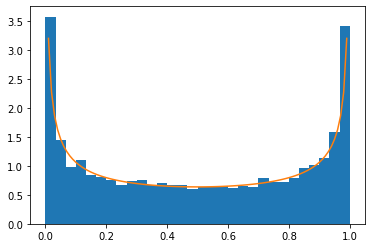

In [10]:
N= 10000
f= lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)
F_inv= lambda u: (np.sin(u*np.pi/2))**2
dfun(f,F_inv,N)

In [11]:
# Código de solución Pablo Muñoz ejercico 2.
#Genero la funcion para la distribución discreta
def Gen_distr_discreta(X:'vector de números aleatorios',
                       prob_ac: 'Prob.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in prob_ac if i<X[j]),range(N))))
    return v

In [12]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()

In [13]:
# Función que calcula la probabilidad acumulada optimizada
def Prob_ac_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

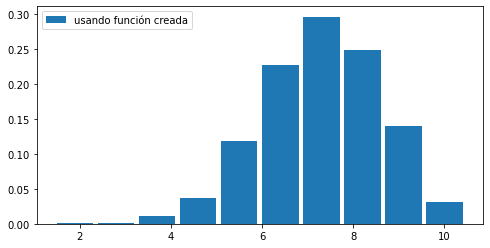

In [14]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = Prob_ac_binomial(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# E2
## Enunciado de tarea (Transcibirlo)
>### <font color ='red'> Ejemplo 4  **Tarea** 
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique en una gráfica el historias 100 muestras generadas y comparela con el función F(x) dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta
### Despejando x

$$x=\sin^{2}(\frac{\mu\pi}{2})$$


### Deerivada de x

$$\frac{d}{dx}F(x) = \frac{1}{x \sqrt {-(x-1)x}}$$


In [2]:
#E2
import numpy as np
import matplotlib.pyplot as plt
def D_erlang(N):
    f = np.random.uniform(0.03,0.97,N)  
    y =list(map(lambda i:(np.sin((f[i]*np.pi)/2))**2 ,range(N)))
    return y

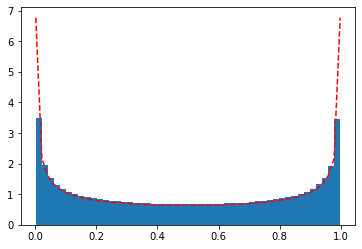

In [3]:
N=10**6
def plot_hist(N):
    r1=D_erlang(N)
    y,x,_=plt.hist(r1,bins=50,density=True)
    y2 = (1/np.pi)*(1/(np.sqrt(1-x)*np.sqrt(x)))
    plt.plot(x,y2,'r--')
    plt.show()
    
plot_hist(N) 

2. La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

>Primero añadimos el 1

>$$p_{i+1}=\frac{n!}{{i+1}!(n-i-1)!}p^{i+1}(1-p)^{n-i-1},\quad i=0,1,\cdots,n$$

>Sustituyendo $P_i$ en $P_{i+1}$

>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p}*[\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}]$$

>Simplificando

>$$p_{i+1}=\frac{n!}{{i+1}!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}$$


### Ejercicio 2: 
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

In [16]:
# Código de solución PAblo Muñoz
# F que calcula la prob. acumulada optimizada
def poisson (n,l):
    Pao= np.zeros(n)
    Pao[0] = np.exp(-l)
    def pao(k):
        nonlocal Pao
        Pao[k+1]=(l/(k+1))*Pao[k]
        
    # Lleno el vector Pao usando compresión de listas
    [pao(k) for k in range(n-1)]
    return np.cumsum(Pao)

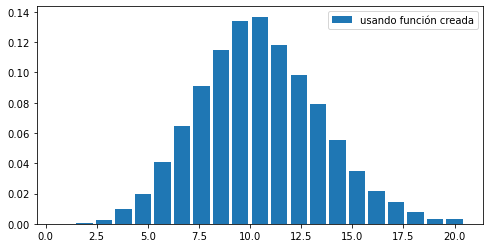

In [17]:
# def D_binomial_intermedia(n,p,N):
n = 20; l = 10; N = 10**4

p_acum = poisson(n,l)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_poisson = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_poisson,'usando función creada')


# E2
#### Código de solución 
$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} k!}{(k+1)!e^{-\lambda}\lambda^k}$$

$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} 1}{e^{-\lambda}\lambda^k ( k + 1)}$$

   elimino los  $e^{-\lambda}$

$$\frac{P(k+1)}{P(k)} = \frac{\lambda^{k+1} 1}{\lambda^k ( k + 1)}$$

$$\frac{P(k+1)}{P(k)} = \frac{\lambda}{( k + 1)}$$

$$P(k+1) = \frac{\lambda P(k)}{( k + 1)}$$

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo


In [19]:
# Código de solución PAblo Muñoz
from scipy import optimize
from scipy.stats import beta

[1.875] [1.875]


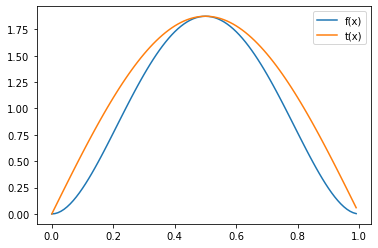

In [20]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(x*np.pi) # función constante
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print(max_f,max_t)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

In [23]:
def comparar_aleatorios_densidad(f,Finv,N):
    u = np.random.uniform(0,1,N)
    f_rand = Finv(u)
    x=np.arange(0,1,.01)
    g = f(x)
    plt.hist(f_rand,density=True, bins=50)
    plt.plot(x,g)
    plt.show()

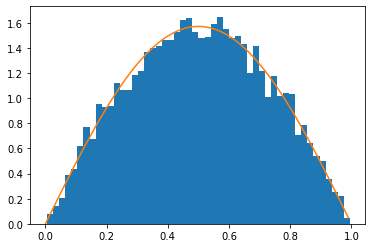

In [24]:
g= lambda x: (np.pi/2)*np.sin(np.pi*x)
Ginv= lambda u:(1/np.pi)*np.arccos(-2*u+1)
N=10000

comparar_aleatorios_densidad(g,Ginv,N)

In [26]:
def Acep(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

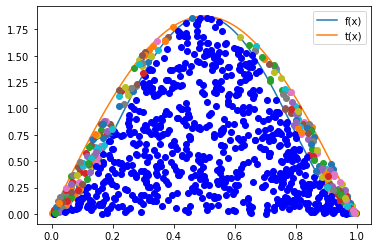

In [29]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función sinoidal
t = lambda x: max_f*np.sin(x*np.pi) # función sinoidal

max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep(R2,R1,f,t)


In [30]:
def Acep2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

In [31]:
#defino la funcion a maximizar
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
tsin= lambda x: max_f*np.sin(x*np.pi) # función sinoidal
tcons= lambda x: max_f*np.ones(len(x)) # función constante 

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones


# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

In [32]:
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante', sum(Acep2(R2,R1,f,tcons))/500)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal', sum(Acep2(R2,R1,f,tsin))/500)

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante 0.536
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal 0.71


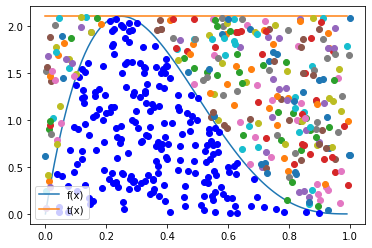

In [33]:
# Imagen del método cuando t es constante
# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep(R2,R1,f,t)



### Ejercicio 1, E2: 
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [18]:
# Código de solución e2
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import random as r
# %matplotlib notebook
%matplotlib inline

El máximo de f es: [1.875]


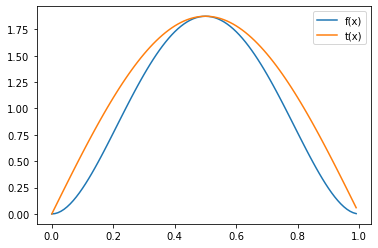

In [25]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(np.pi*x) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)


### Ejercicio 2, E2:
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

#### Código de solución 
$$g(x)=\frac{f(x)}{c}$$
$$c = \int_{-\infty}^{\infty} t(x) \cdot dx$$

Por el metodo de aceptacion y rechazo modificamos los limites a "a" y "b", donde a = 0 y b = 1.

$$ \int_{a}^{b} t(x) \cdot dx$$

$$ \int_{0}^{1} t(x) \cdot dx$$

$$ \int_{0}^{1} a \sin(\pi x) \cdot dx$$

$$ \frac{a}{\pi}(-\cos(\pi x)|_{0}^{1} $$

$$ \frac{2a}{\pi} $$

$$ g(x) = \frac{a \sin(\pi x)}{\frac{2a}{\pi}} $$

$$ g(x) = \frac{ \sin(\pi x)}{\frac{2}{\pi}} $$

$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$

### Ejercicio 3, E2:
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

#### Código de solución 
La función inversa es 

$$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

$$ G(x) =  \frac{1}{2}(- \cos(\pi x)+1) $$

$$ U = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ 2U = (- \cos(\pi x)+1) $$

$$ 2U-1 = - \cos(\pi x) $$

$$ -2U+1 = \cos(\pi x) $$

$$ \cos^{-1}(-2U+1) = \pi x$$

$$ \frac{\cos^{-1}(-2U+1)}{\pi} = x$$

### Ejercicio 4, E2:
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

In [31]:
def g(x):
    y = (np.pi*np.sin(np.pi*x))/2  #sin
    return y

def g_inv(u):
    x = (np.arccos(-2*u+1))/(np.pi)
    return x

def m_aleatorias(n):
    u = np.random.uniform(0, 1, n)
    r = np.array(list(map(lambda i: g_inv(u[i]), range(n))))
    return r

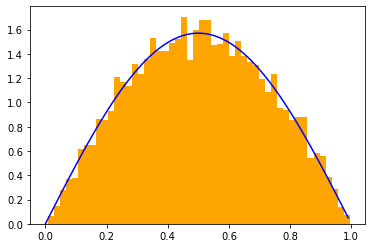

In [34]:
r1 = m_aleatorias(10000)

_x = np.arange(0,1,0.01)
_y = g(_x)

plt.hist(r1, bins=50, density=True, color='orange')
plt.plot(_x,_y,'b')

### Ejercicio 5, E2:
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

In [36]:
# Código de solución 
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    q = 0
    condition = R2*t_x <=f_x
    for i in range(len(R1)):
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'ob')
            q += 1
        else:
            plt.plot(R1[i],R2[i]*t_x[i],'o')
    plt.show()
    return q

El máximo de f es: [1.875]


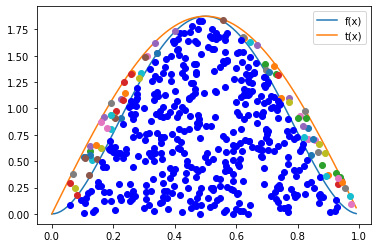

In [37]:
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 
R2 = np.random.rand(N)
R1 = m_aleatorias(N)


quantity_sin = Acep_rechazo(R2,R1,f,t)

### Ejercicio 6, E2:
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

El máximo de f es: [1.875]


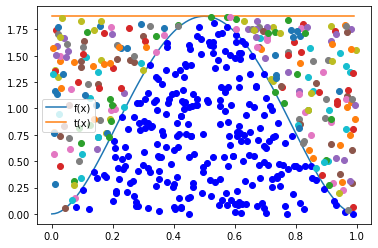

In [41]:
# Código de solución 
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()


N = 500
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

quantity_const = Acep_rechazo(R2,R1,f,t)

In [42]:
print(f"El porcentaje de puntos de aceptacion para t(x) con pulso senoidal es de: {quantity_sin*100/500}%")
print(f"Mientras que para t(x) constante es de: {quantity_const*100/500}%")

El porcentaje de puntos de aceptacion para t(x) con pulso senoidal es de: 84.0%
Mientras que para t(x) constante es de: 51.6%


### Ejercicio 7, E2:
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de f es: [2.109375]


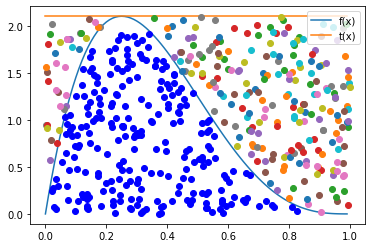

In [59]:
# Código de solución 
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)